In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf
import pandas_datareader as pdr
import datetime

In [4]:
yf.pdr_override()
sp500 = yf.download('SPY', start='2005-01-03', end='2022-10-29')
sp500['return'] = np.log(sp500.Close/sp500.Close.shift(1))
sp500['cumreturn'] = sp500['return'].cumsum().apply(np.exp)
sp500.fillna(1, inplace=True)
sp500

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume,return,cumreturn
Date,,,,,,,,
2005-01-03,121.559998,121.760002,119.900002,120.300003,84.894363,55748000,1.000000,1.000000
2005-01-04,120.459999,120.540001,118.440002,118.830002,83.857018,69167600,-0.012295,0.987781
2005-01-05,118.739998,119.250000,118.000000,118.010002,83.278305,65667300,-0.006925,0.980964
2005-01-06,118.440002,119.150002,118.260002,118.610001,83.701698,47814700,0.005071,0.985952
2005-01-07,118.970001,119.230003,118.129997,118.440002,83.581734,55847700,-0.001434,0.984539
...,...,...,...,...,...,...,...,...
2022-10-24,375.890015,380.059998,373.109985,378.869995,377.138184,85436900,0.012162,3.149376
2022-10-25,378.790009,385.250000,378.670013,384.920013,383.160522,78846300,0.015842,3.199668
2022-10-26,381.619995,387.579987,381.350006,382.019989,380.273773,104087300,-0.007563,3.175561


In [5]:
def plot_returns(data):
    plt.figure(figsize=(20, 12))
    plt.plot(data.index, data['cumreturn'], color='red', label='SPY')
    plt.title('SPY Buy & Hold')
    plt.gca().grid(True)
    plt.xlim(xmin=data.index[0], xmax=data.index[-1])
    ymin, ymax = 0, max(data.cumreturn)
    length = len(data)-1
    
    plt.axhspan(ymin, ymax, 
                list(data.index).index(data.loc[data.index >= '2007-07-01', :].index[0])/length, 
                list(data.index).index(data.loc[data.index >= '2009-04-01', :].index[0])/length, 
                label='2008 Global Financial Crisis', facecolor='#d7f1f5')
    plt.axhspan(ymin, ymax, 
                list(data.index).index(data.loc[data.index >= '2010-01-01', :].index[0])/length, 
                list(data.index).index(data.loc[data.index >= '2010-09-01', :].index[0])/length, 
                label='2010 Eurozone Crisis', facecolor='#f2f5d7')
    plt.axhspan(ymin, ymax, 
                list(data.index).index(data.loc[data.index >= '2011-08-01', :].index[0])/length, 
                list(data.index).index(data.loc[data.index >= '2012-01-01', :].index[0])/length, 
                label='2011 S&P 500 Credit Downgrade', facecolor='#d7f5e9')
    plt.axhspan(ymin, ymax, 
                list(data.index).index(data.loc[data.index >= '2015-08-01', :].index[0])/length, 
                list(data.index).index(data.loc[data.index >= '2016-02-28', :].index[0])/length, 
                label='2016 Chinese Stock Market Crash', facecolor='#ffc7c7')
    plt.axhspan(ymin, ymax, 
                list(data.index).index(data.loc[data.index >= '2018-09-01', :].index[0])/length, 
                list(data.index).index(data.loc[data.index >= '2019-01-01', :].index[0])/length, 
                label='2018 Crypto Crash', facecolor='#ffc7fa')
    plt.axhspan(ymin, ymax, 
                list(data.index).index(data.loc[data.index >= '2020-02-01', :].index[0])/length, 
                list(data.index).index(data.loc[data.index >= '2020-04-07', :].index[0])/length, 
                label='2020 Covid Recession', facecolor='#c7ffe0')
    plt.axhspan(ymin, ymax, 
                list(data.index).index(data.loc[data.index >= '2022-01-01', :].index[0])/length, 
                list(data.index).index(data.loc[data.index >= '2022-10-28', :].index[0])/length, 
                label='2022 Post-Ukraine Invasion', facecolor='#d1c7ff')
    
    plt.legend(loc='upper left')

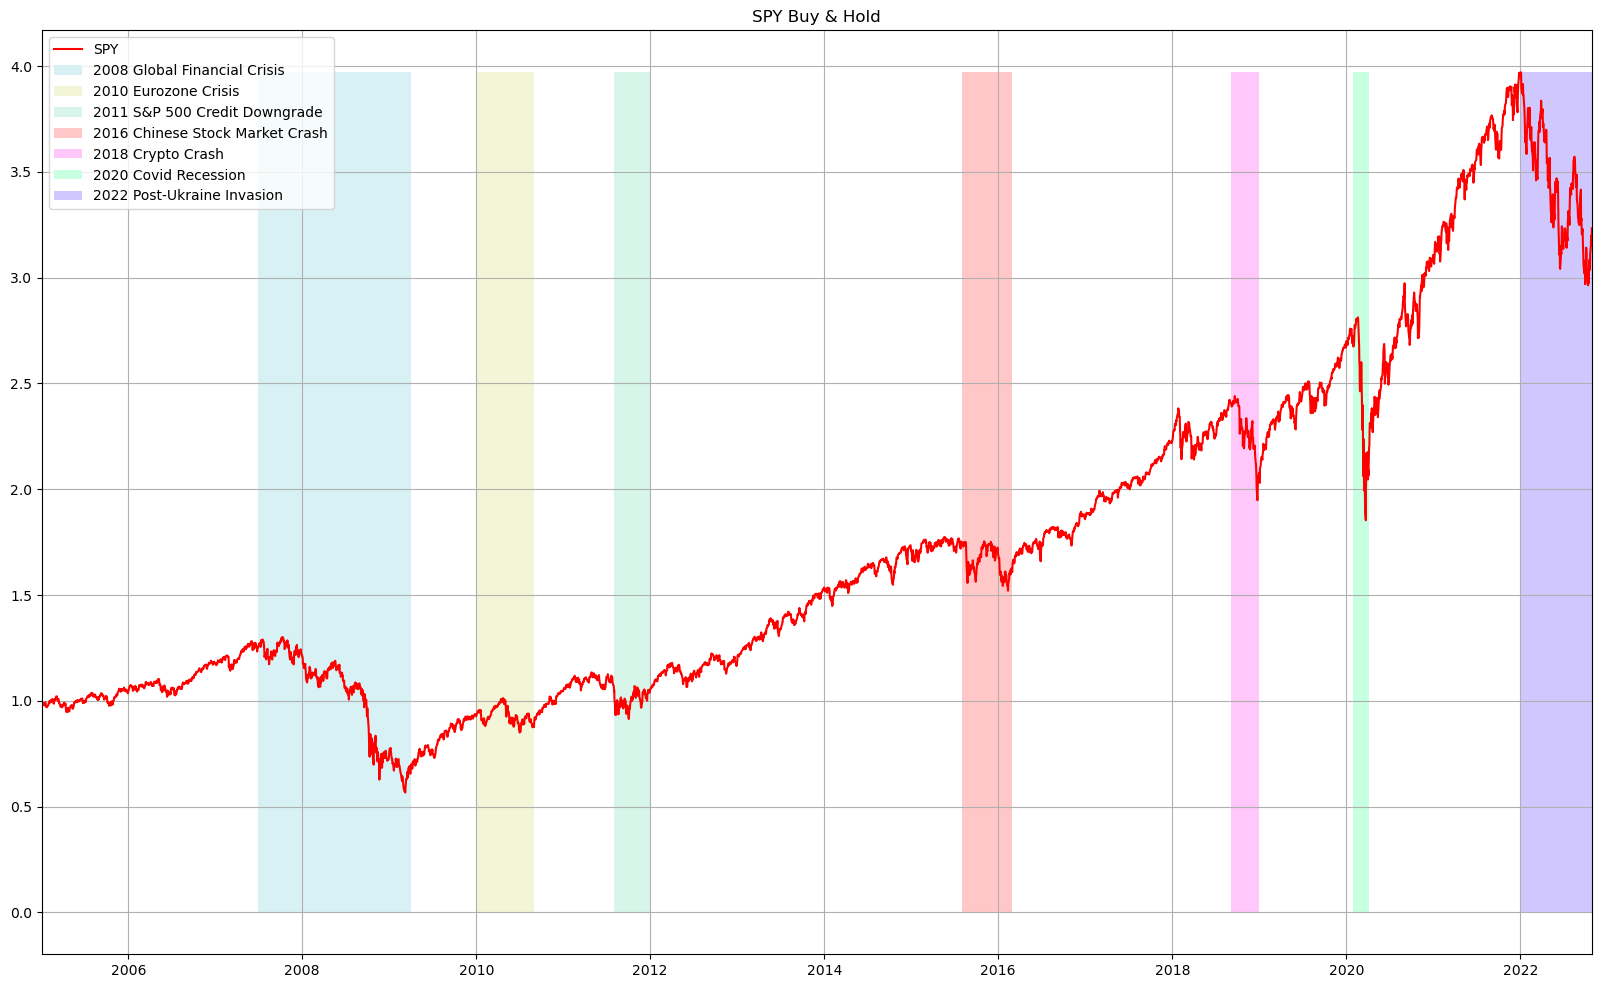

In [6]:
plot_returns(sp500)